In [5]:
import json
message = []

# Opening JSON file
f = open('user_data/John/John_messages.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# Iterating through the json
# list
for i in data:
    try:
        if i['media'] == None:
            message.append(i['message'])
        
        
    except:
        pass
  
# Closing file
f.close()
len(message)

11509

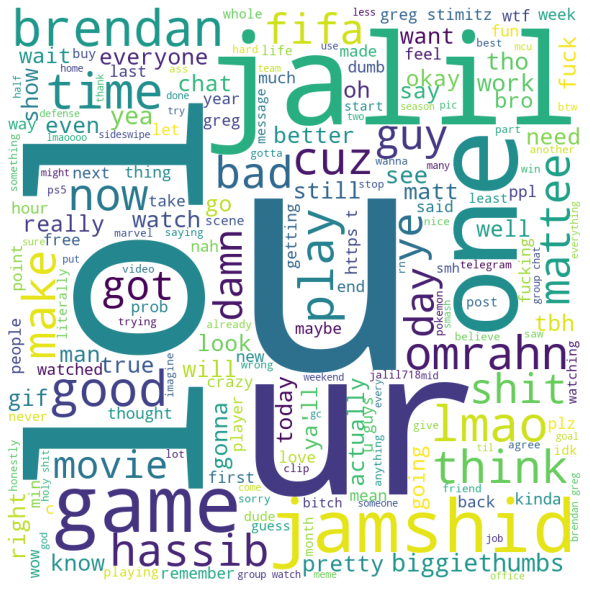

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [7]:
len([x for x in comment_words if x == 'jalil'])

0

# Praveen's lectures

In [8]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
import matplotlib.pyplot as plt
import string
import re
import numpy as np

In [9]:
nltk.download("stopwords")
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jalilsarwari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jalilsarwari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk.tokenize import word_tokenize # nltk's gold standard word tokenizer
from nltk.tokenize import sent_tokenize # nltk's sentence tokenizer

In [11]:
message[0]

'OOF, poorly scheduled messages'

In [12]:
sent_tokenize(message[0])

['OOF, poorly scheduled messages']

In [13]:
print([word_tokenize(sent) for sent in sent_tokenize(message[0])])

[['OOF', ',', 'poorly', 'scheduled', 'messages']]


In [14]:
corpus = [word_tokenize(doc) for doc in message]
print(corpus[0:4])

[['OOF', ',', 'poorly', 'scheduled', 'messages'], ['https', ':', '//t.me/c/1179447288/67840'], ['Do', "n't", 'ignore', 'me', 'Omrahn'], ['And', 'anyone', 'else', 'who', "'s", 'interested', ':', ')']]


In [15]:
import itertools
flattenedcorpus_tokens = pd.Series(list(itertools.chain(*corpus)))
print(flattenedcorpus_tokens.shape)

(83152,)


In [16]:
dictionary = pd.Series(
    flattenedcorpus_tokens.unique())
print(len(dictionary))

9563


In [17]:
flattenedcorpus_tokens.value_counts()[:10]

I      2683
the    1774
,      1529
to     1332
a      1313
's     1049
?       994
u       945
it      926
is      890
dtype: int64

In [108]:
# imports package with many stopword lists
from nltk.corpus import stopwords

# get common stop words in english that we'll remove during tokenization/text normalization
stop_words = stopwords.words('english')
stop_words.append('u')
stop_words.append('ur')
stop_words.append(',')
stop_words.append('http')
stop_words.append('https')
stop_words[0:5]

['i', 'me', 'my', 'myself', 'we']

In [109]:
message

['OOF, poorly scheduled messages',
 'https://t.me/c/1179447288/67840',
 "Don't ignore me Omrahn",
 "And anyone else who's interested :)",
 'I will, no joke, plan a day trip with u next month to go to the ocky store if ur willing',
 'Omrahn',
 'Holy fuck, jamshid and hassib heavy as fuck',
 'Simple joke, simple meme',
 'Omrahn brings 3 friends to play fifa',
 'Holy shit',
 'I just thought it was funny',
 'Ur not banned from fifa u weirdo',
 'I just thought it was funny',
 'There is no hypocrisy there u crazy man',
 'Matt @biggiethumbs',
 'Bitch',
 "I'm free fatty",
 '@biggiethumbs',
 '@biggiethumbs',
 '@biggiethumbs',
 'Hey @biggiethumbs fifa tn?',
 'Ey yo',
 "Smh, THE WHEEL SPOKE AND YA'LL BROKE THE WHEEL",
 'Gw what?',
 'I watched chainsaw man, add me plz',
 'Get jamshid to watch anime, I like it',
 'Wow, genius plan',
 'Holy shit',
 'Is jamshid actually watching chainsaw man?',
 'That seems harsh',
 'Can I be added to the 2nd chainsaw man chat uwu after',
 'No imma do that now',
 "Al

In [110]:
def first_step_normalizer(doc):
    # filters for alphabetic (no punctuation or numbers) and filters out stop words. 
    # lower cases all tokens
    norm_text = []
    for x in word_tokenize(doc):
        if x.isalpha():
            x = x.lower()
        if x not in stop_words and '@' not in x:
            norm_text.append(x)
    return norm_text

In [111]:
token_norm = [first_step_normalizer(x) for x in message]

In [112]:
token_norm

[['oof', 'poorly', 'scheduled', 'messages'],
 [':', '//t.me/c/1179447288/67840'],
 ["n't", 'ignore', 'omrahn'],
 ['anyone', 'else', "'s", 'interested', ':', ')'],
 ['joke',
  'plan',
  'day',
  'trip',
  'next',
  'month',
  'go',
  'ocky',
  'store',
  'willing'],
 ['omrahn'],
 ['holy', 'fuck', 'jamshid', 'hassib', 'heavy', 'fuck'],
 ['simple', 'joke', 'simple', 'meme'],
 ['omrahn', 'brings', '3', 'friends', 'play', 'fifa'],
 ['holy', 'shit'],
 ['thought', 'funny'],
 ['banned', 'fifa', 'weirdo'],
 ['thought', 'funny'],
 ['hypocrisy', 'crazy', 'man'],
 ['matt', '@', 'biggiethumbs'],
 ['bitch'],
 ["'m", 'free', 'fatty'],
 ['@', 'biggiethumbs'],
 ['@', 'biggiethumbs'],
 ['@', 'biggiethumbs'],
 ['hey', '@', 'biggiethumbs', 'fifa', 'tn', '?'],
 ['ey', 'yo'],
 ['smh', 'wheel', 'spoke', 'ya', "'LL", 'broke', 'wheel'],
 ['gw', '?'],
 ['watched', 'chainsaw', 'man', 'add', 'plz'],
 ['get', 'jamshid', 'watch', 'anime', 'like'],
 ['wow', 'genius', 'plan'],
 ['holy', 'shit'],
 ['jamshid', 'actuall

In [113]:
message[0:15]

['OOF, poorly scheduled messages',
 'https://t.me/c/1179447288/67840',
 "Don't ignore me Omrahn",
 "And anyone else who's interested :)",
 'I will, no joke, plan a day trip with u next month to go to the ocky store if ur willing',
 'Omrahn',
 'Holy fuck, jamshid and hassib heavy as fuck',
 'Simple joke, simple meme',
 'Omrahn brings 3 friends to play fifa',
 'Holy shit',
 'I just thought it was funny',
 'Ur not banned from fifa u weirdo',
 'I just thought it was funny',
 'There is no hypocrisy there u crazy man',
 'Matt @biggiethumbs']

# Word Cloud, cleaned

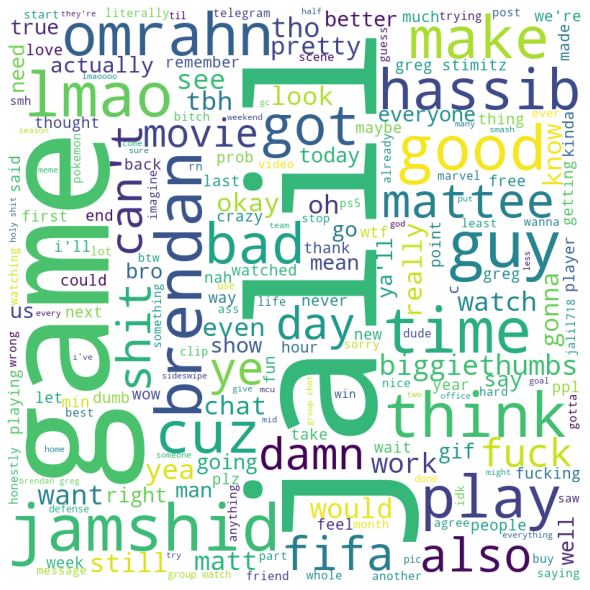

In [114]:
stop_words2 = stop_words
stop_words2.append("'")
stop_words2.append(",")
stop_words2.append("i'm")
stop_words2.append("like")
stop_words2.append("lol")
stop_words2.append("get")
stop_words2.append("http")
stop_words2.append("one")




# Reads 'Youtube04-Eminem.csv' file
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in message:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words2,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [115]:
token_jalilified

[['OOF,', 'poorly', 'scheduled', 'messages'],
 ['https://t.me/c/1179447288/67840'],
 ["Don't", 'ignore', 'omrahn'],
 ['anyone', 'else', "who's", 'interested', ':)'],
 ['will,',
  'joke,',
  'plan',
  'day',
  'trip',
  'next',
  'month',
  'go',
  'ocky',
  'store',
  'willing'],
 ['omrahn'],
 ['holy', 'fuck,', 'jamshid', 'hassib', 'heavy', 'fuck'],
 ['simple', 'joke,', 'simple', 'meme'],
 ['omrahn', 'brings', '3', 'friends', 'play', 'fifa'],
 ['holy', 'shit'],
 ['thought', 'funny'],
 ['banned', 'fifa', 'weirdo'],
 ['thought', 'funny'],
 ['hypocrisy', 'crazy', 'man'],
 ['matt'],
 ['bitch'],
 ["I'm", 'free', 'fatty'],
 [],
 [],
 [],
 ['hey', 'fifa', 'tn?'],
 ['ey', 'yo'],
 ['Smh,', 'wheel', 'spoke', "YA'LL", 'broke', 'wheel'],
 ['gw', 'what?'],
 ['watched', 'chainsaw', 'man,', 'add', 'plz'],
 ['get', 'jamshid', 'watch', 'anime,'],
 ['Wow,', 'genius', 'plan'],
 ['holy', 'shit'],
 ['jamshid', 'actually', 'watching', 'chainsaw', 'man?'],
 ['seems', 'harsh'],
 ['added', '2nd', 'chainsaw', '

In [116]:
norm_toks_flattened = pd.Series(list(
    itertools.chain(*token_norm
                   )))
new_dictionary = norm_toks_flattened.unique()
print(len(new_dictionary))
print(len(dictionary))

7632
9563


## Stemming/lemmatizing

In [117]:
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet
from nltk import pos_tag # nltk's native part of speech tagging
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jalilsarwari/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jalilsarwari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [118]:
sent_string = "The dog licked the babies in the face."
sent_tok_list = word_tokenize(sent_string)
sent_tok_list

['The', 'dog', 'licked', 'the', 'babies', 'in', 'the', 'face', '.']

In [119]:
token_norm_tagged = [pos_tag(x) for x in token_norm]

In [120]:
token_norm_tagged[0][0][0]

'oof'

In [121]:
# helper function to change nltk's part of speech tagging to a wordnet format.
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

In [122]:
#wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), token_norm_tagged)) 
#print(wordnet_tagged)
wordnet_tagged = []
for sentence in token_norm_tagged:
    wordnet_tagged.append([(x[0], pos_tagger(x[1])) for x in sentence])

In [123]:
wordnet_tagged

[[('oof', 'r'), ('poorly', 'r'), ('scheduled', 'v'), ('messages', 'n')],
 [(':', None), ('//t.me/c/1179447288/67840', 'n')],
 [("n't", 'r'), ('ignore', 'v'), ('omrahn', 'n')],
 [('anyone', 'n'),
  ('else', 'r'),
  ("'s", None),
  ('interested', 'a'),
  (':', None),
  (')', None)],
 [('joke', 'n'),
  ('plan', 'n'),
  ('day', 'n'),
  ('trip', 'n'),
  ('next', 'a'),
  ('month', 'n'),
  ('go', 'v'),
  ('ocky', 'a'),
  ('store', 'n'),
  ('willing', 'a')],
 [('omrahn', 'n')],
 [('holy', 'a'),
  ('fuck', 'n'),
  ('jamshid', 'n'),
  ('hassib', 'n'),
  ('heavy', 'a'),
  ('fuck', 'n')],
 [('simple', 'a'), ('joke', 'n'), ('simple', 'a'), ('meme', 'n')],
 [('omrahn', 'a'),
  ('brings', 'v'),
  ('3', None),
  ('friends', 'n'),
  ('play', 'v'),
  ('fifa', 'n')],
 [('holy', 'n'), ('shit', 'n')],
 [('thought', 'v'), ('funny', 'n')],
 [('banned', 'v'), ('fifa', 'n'), ('weirdo', 'v')],
 [('thought', 'v'), ('funny', 'n')],
 [('hypocrisy', 'n'), ('crazy', 'n'), ('man', 'n')],
 [('matt', 'n'), ('@', None),

In [142]:
message

['OOF, poorly scheduled messages',
 'https://t.me/c/1179447288/67840',
 "Don't ignore me Omrahn",
 "And anyone else who's interested :)",
 'I will, no joke, plan a day trip with u next month to go to the ocky store if ur willing',
 'Omrahn',
 'Holy fuck, jamshid and hassib heavy as fuck',
 'Simple joke, simple meme',
 'Omrahn brings 3 friends to play fifa',
 'Holy shit',
 'I just thought it was funny',
 'Ur not banned from fifa u weirdo',
 'I just thought it was funny',
 'There is no hypocrisy there u crazy man',
 'Matt @biggiethumbs',
 'Bitch',
 "I'm free fatty",
 '@biggiethumbs',
 '@biggiethumbs',
 '@biggiethumbs',
 'Hey @biggiethumbs fifa tn?',
 'Ey yo',
 "Smh, THE WHEEL SPOKE AND YA'LL BROKE THE WHEEL",
 'Gw what?',
 'I watched chainsaw man, add me plz',
 'Get jamshid to watch anime, I like it',
 'Wow, genius plan',
 'Holy shit',
 'Is jamshid actually watching chainsaw man?',
 'That seems harsh',
 'Can I be added to the 2nd chainsaw man chat uwu after',
 'No imma do that now',
 "Al

In [161]:
noun_messages = []
for x in wordnet_tagged:
    z = []
    for y in x:
        if(y[1]=='n'):
            z.append(y[0]) 
    noun_messages.append(z)
for i in range(len(noun_messages)):
    noun_messages[i]= " ".join(noun_messages[i])+" "
nouns = []
for x in noun_messages:
    if len(x) != 0:
        nouns.append(x)
nouns

['messages ',
 '//t.me/c/1179447288/67840 ',
 'omrahn ',
 'anyone ',
 'joke plan day trip month store ',
 'omrahn ',
 'fuck jamshid hassib fuck ',
 'joke meme ',
 'friends fifa ',
 'holy shit ',
 'funny ',
 'fifa ',
 'funny ',
 'hypocrisy crazy man ',
 'matt biggiethumbs ',
 'bitch ',
 'fatty ',
 '@ biggiethumbs ',
 '@ biggiethumbs ',
 '@ biggiethumbs ',
 'hey biggiethumbs tn ',
 'ey yo ',
 'smh wheel wheel ',
 'gw ',
 'chainsaw man plz ',
 'watch anime ',
 'wow genius plan ',
 'holy shit ',
 'jamshid chainsaw man ',
 'harsh ',
 'chainsaw man ',
 'imma ',
 'thrice day ',
 'others messages genius artists artists ',
 'aint ',
 'dick peoples boundaries ',
 'father time song ',
 'jamshids 🤔 ',
 'matt ',
 'tik toker engineer lmaoooo ',
 'time ',
 'think get base redemption arc ',
 'talk body struggles bit bada bada boom profit ',
 'time money airbnb ',
 'anyone lma9oooo ',
 'dick ',
 'companies ',
 ' ',
 'lot people internet ',
 ' ',
 'sense ',
 ' ',
 'mattee adventures college ',
 'huh ',


In [159]:
noun_messages

[['messages'],
 ['//t.me/c/1179447288/67840'],
 ['omrahn'],
 ['anyone'],
 ['joke', 'plan', 'day', 'trip', 'month', 'store'],
 ['omrahn'],
 ['fuck', 'jamshid', 'hassib', 'fuck'],
 ['joke', 'meme'],
 ['friends', 'fifa'],
 ['holy', 'shit'],
 ['funny'],
 ['fifa'],
 ['funny'],
 ['hypocrisy', 'crazy', 'man'],
 ['matt', 'biggiethumbs'],
 ['bitch'],
 ['fatty'],
 ['@', 'biggiethumbs'],
 ['@', 'biggiethumbs'],
 ['@', 'biggiethumbs'],
 ['hey', 'biggiethumbs', 'tn'],
 ['ey', 'yo'],
 ['smh', 'wheel', 'wheel'],
 ['gw'],
 ['chainsaw', 'man', 'plz'],
 ['watch', 'anime'],
 ['wow', 'genius', 'plan'],
 ['holy', 'shit'],
 ['jamshid', 'chainsaw', 'man'],
 ['harsh'],
 ['chainsaw', 'man'],
 ['imma'],
 ['thrice', 'day'],
 ['others', 'messages', 'genius', 'artists', 'artists'],
 ['aint'],
 ['dick', 'peoples', 'boundaries'],
 ['father', 'time', 'song'],
 ['jamshids', '🤔'],
 ['matt'],
 ['tik', 'toker', 'engineer', 'lmaoooo'],
 ['time'],
 ['think', 'get', 'base', 'redemption', 'arc'],
 ['talk', 'body', 'struggles

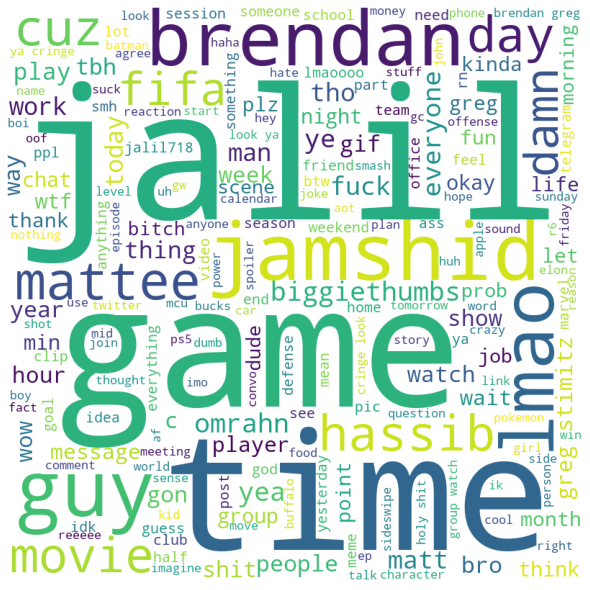

In [173]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in nouns:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words2,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("john's mvp wordcloud")
plt.show()

In [188]:
new_words = ["reeee","bro","need","tbh","ppl","wow","guy","dude","ye","okay","ik","ep","ya","plz","need","look","idk","c",'b','imo','smh','haha',"n't"]
stop_words3 = stop_words2 + new_words

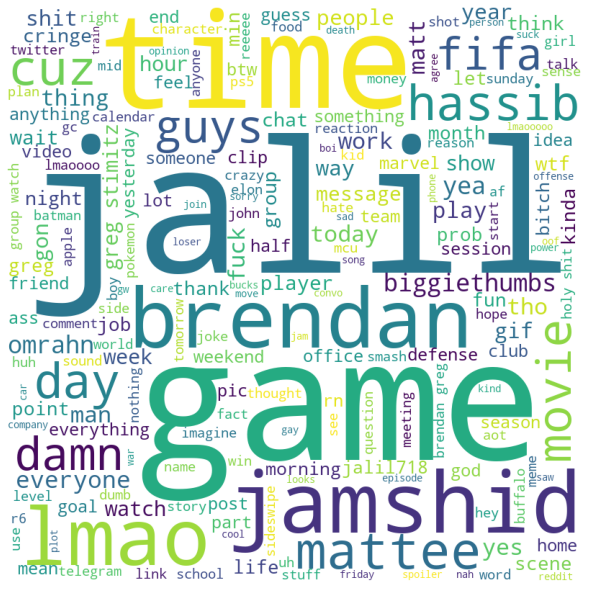

In [180]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in nouns:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words3,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("john's mvp wordcloud")
plt.show()

In [185]:
from itertools import chain
flattened_wordnet_tagged =  list(chain.from_iterable(wordnet_tagged))
flattened_wordnet_tagged

[('oof', 'r'),
 ('poorly', 'r'),
 ('scheduled', 'v'),
 ('messages', 'n'),
 (':', None),
 ('//t.me/c/1179447288/67840', 'n'),
 ("n't", 'r'),
 ('ignore', 'v'),
 ('omrahn', 'n'),
 ('anyone', 'n'),
 ('else', 'r'),
 ("'s", None),
 ('interested', 'a'),
 (':', None),
 (')', None),
 ('joke', 'n'),
 ('plan', 'n'),
 ('day', 'n'),
 ('trip', 'n'),
 ('next', 'a'),
 ('month', 'n'),
 ('go', 'v'),
 ('ocky', 'a'),
 ('store', 'n'),
 ('willing', 'a'),
 ('omrahn', 'n'),
 ('holy', 'a'),
 ('fuck', 'n'),
 ('jamshid', 'n'),
 ('hassib', 'n'),
 ('heavy', 'a'),
 ('fuck', 'n'),
 ('simple', 'a'),
 ('joke', 'n'),
 ('simple', 'a'),
 ('meme', 'n'),
 ('omrahn', 'a'),
 ('brings', 'v'),
 ('3', None),
 ('friends', 'n'),
 ('play', 'v'),
 ('fifa', 'n'),
 ('holy', 'n'),
 ('shit', 'n'),
 ('thought', 'v'),
 ('funny', 'n'),
 ('banned', 'v'),
 ('fifa', 'n'),
 ('weirdo', 'v'),
 ('thought', 'v'),
 ('funny', 'n'),
 ('hypocrisy', 'n'),
 ('crazy', 'n'),
 ('man', 'n'),
 ('matt', 'n'),
 ('@', None),
 ('biggiethumbs', 'n'),
 ('bitch', 

In [186]:
wnl = WordNetLemmatizer()
doc_lemmatized = [wnl.lemmatize(token, pos) for token, pos in flattened_wordnet_tagged if pos is not None]
print(doc_lemmatized)

['oof', 'poorly', 'schedule', 'message', '//t.me/c/1179447288/67840', "n't", 'ignore', 'omrahn', 'anyone', 'else', 'interested', 'joke', 'plan', 'day', 'trip', 'next', 'month', 'go', 'ocky', 'store', 'willing', 'omrahn', 'holy', 'fuck', 'jamshid', 'hassib', 'heavy', 'fuck', 'simple', 'joke', 'simple', 'meme', 'omrahn', 'bring', 'friend', 'play', 'fifa', 'holy', 'shit', 'think', 'funny', 'ban', 'fifa', 'weirdo', 'think', 'funny', 'hypocrisy', 'crazy', 'man', 'matt', 'biggiethumbs', 'bitch', "'m", 'free', 'fatty', '@', 'biggiethumbs', '@', 'biggiethumbs', '@', 'biggiethumbs', 'hey', '@', 'biggiethumbs', 'fifa', 'tn', 'ey', 'yo', 'smh', 'wheel', 'speak', 'break', 'wheel', 'gw', 'watch', 'chainsaw', 'man', 'add', 'plz', 'get', 'jamshid', 'watch', 'anime', 'wow', 'genius', 'plan', 'holy', 'shit', 'jamshid', 'actually', 'watch', 'chainsaw', 'man', 'seem', 'harsh', 'add', 'chainsaw', 'man', 'chat', 'uwu', 'imma', 'also', 'fwd', 'like', 'thrice', 'day', 'ya', 'dramatic', 'others', 'put', 'eloq

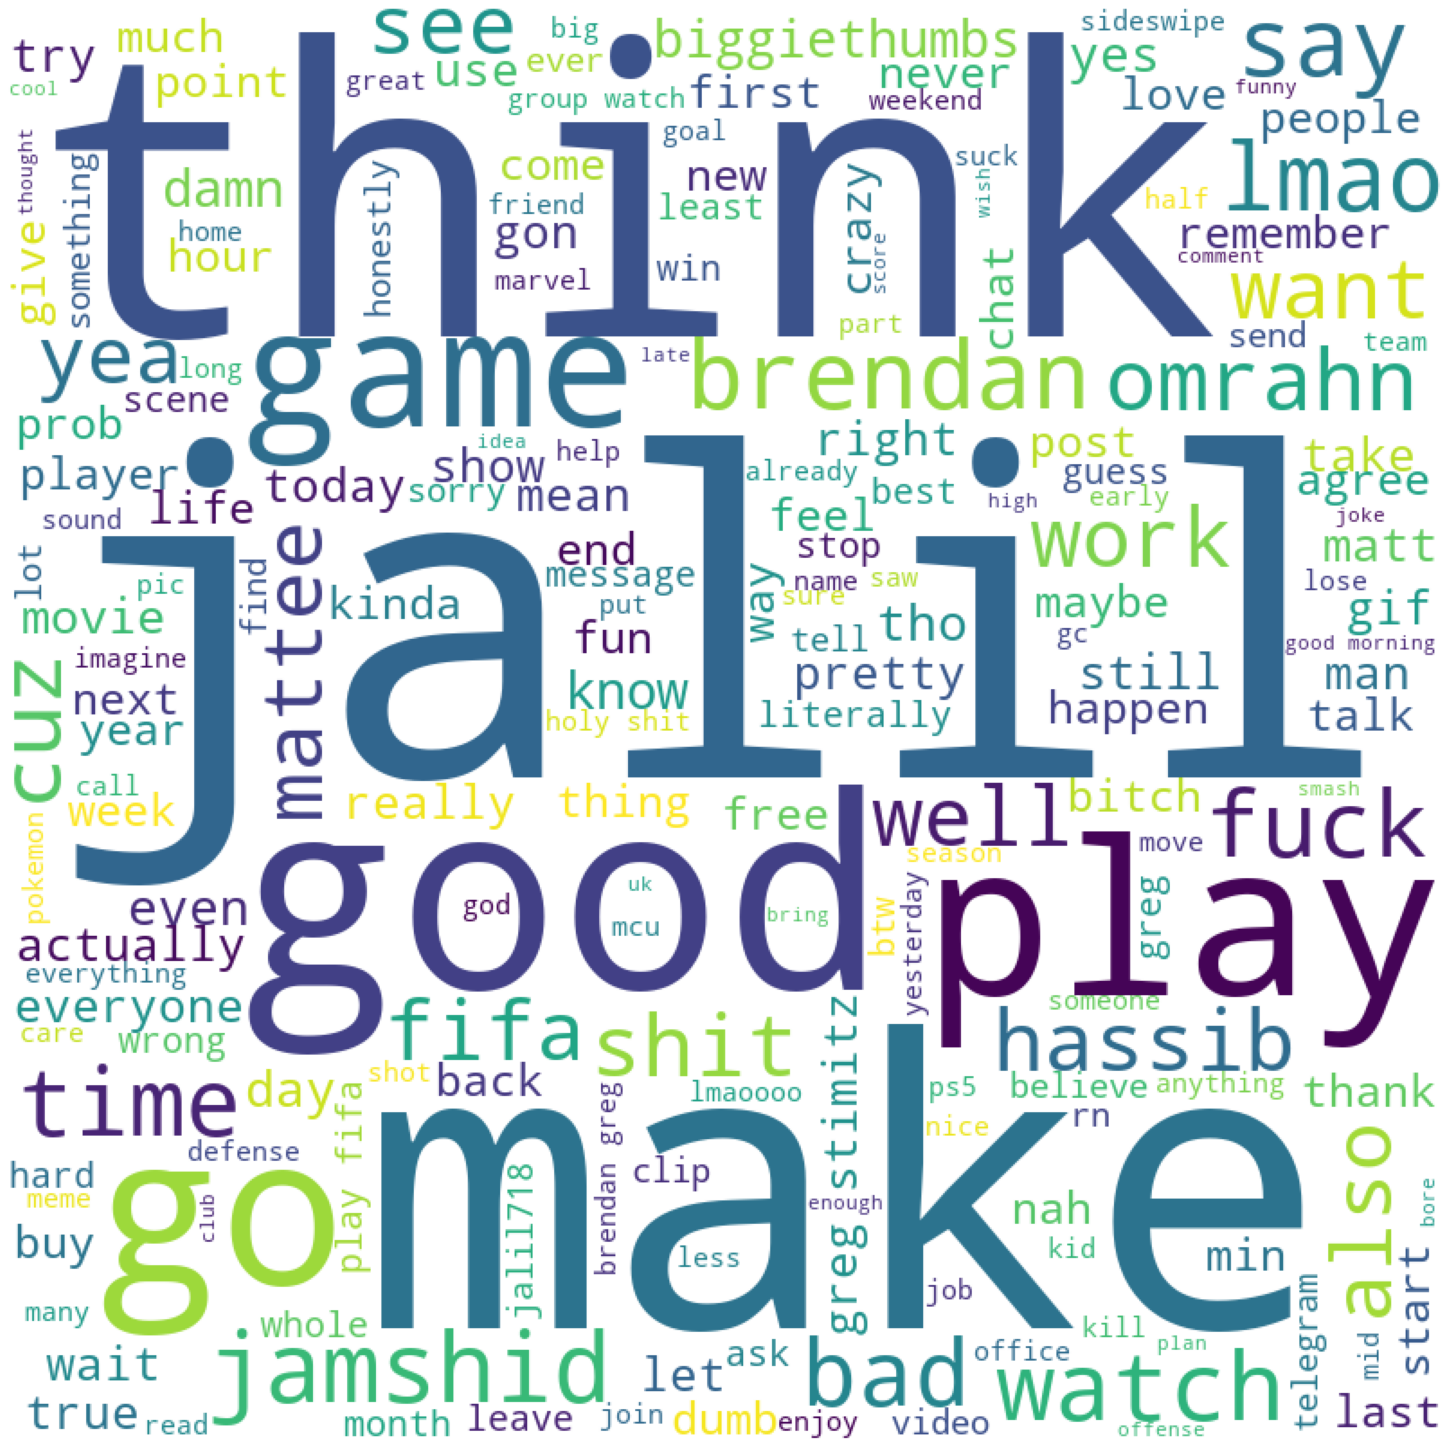

In [191]:
new_words2 = ['.first','wtf','ta']
stop_words4 = stop_words3 + new_words2

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in doc_lemmatized:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words4,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (20, 20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("john's mvp wordcloud")
plt.show()

In [195]:
doc_lemmatized_pd = pd.Series(doc_lemmatized)

In [204]:
doc_lemmatized_pd.value_counts().iloc[:30]

n't        841
get        529
lol        483
'm         463
play       323
jalil      305
good       297
watch      276
make       274
brendan    266
game       259
think      252
go         236
time       233
fifa       231
fuck       223
say        212
guy        210
@          207
shit       206
bad        205
lmao       204
jamshid    202
cuz        191
greg       184
🤔          165
look       162
omrahn     160
mattee     157
work       155
dtype: int64